## Implement Bollinger Bands for a given Symbol, Start Date and End Date

In [1]:
import yfinance as yf
from datetime import datetime, time, date, timedelta
import os
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
%matplotlib inline

In [26]:
data_dir = '..\qstk\QSData\Yahoo'
start_date = datetime(2010,1,1)
end_date = datetime(2010,12,31)
syms = 'AAPL'

In [29]:
def gen_price_frame(syms, start_date, end_date):
    df = pd.read_csv(os.path.join(data_dir, syms + '.csv'))
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date )].reset_index(drop=True)
    df = df.set_index('Date').sort_index()
    
    return df

In [4]:
def bb_bands(price_df, lookback=10, std=1):
    price_df['Close_Avg']  = price_df['Close'].rolling(window=lookback).mean()
    price_df['Std']        = price_df['Close'].rolling(window=lookback).std() * std
    price_df['Upper_Band'] = price_df['Close_Avg'] + price_df['Std']
    price_df['Lower_Band'] = price_df['Close_Avg'] - price_df['Std']
    
    price_df['Bollinger']  = np.where(price_df['Close'] >= price_df['Upper_Band'],1, 
                                   (np.where(price_df['Close'] <= price_df['Lower_Band'],-1, 
                                             (price_df['Close'] - price_df['Close_Avg'])/price_df['Std'])))
    
    return price_df

In [ ]:
price_df = gen_price_frame(syms, start_date, end_date)
price_df = bb_bands(price_df, 10,1)

Text(0.5, 1.0, 'Bollinger Values')

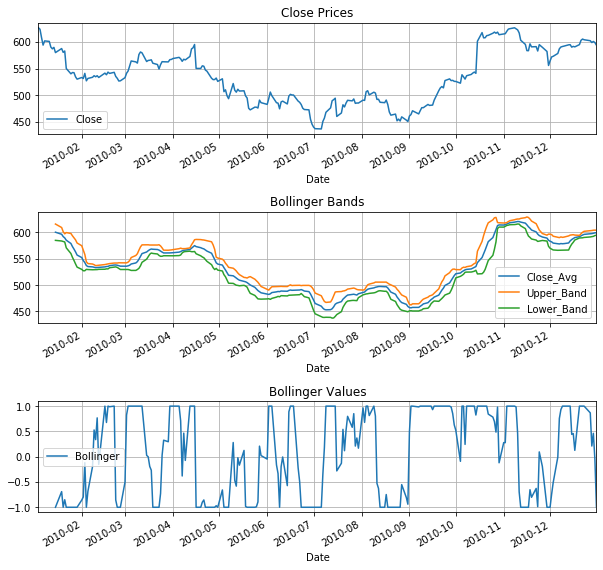

In [25]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
plt.subplots_adjust(wspace=0.2, hspace=0.7)

price_df[['Close']].plot(ax=axes[0], grid=True).set_title("Close Prices")
price_df[['Close_Avg', 'Upper_Band', 'Lower_Band']].plot(ax=axes[1], grid=True).set_title("Bollinger Bands")
price_df[['Bollinger']].plot(ax=axes[2], grid=True).set_title("Bollinger Values")
plt.show()

## Quiz questions and corresponding answers

In [ ]:
price_df = gen_price_frame('AAPL', start_date, end_date)
price_df = bb_bands(price_df, 20,1)

In [38]:
price_df[price_df.index == '2010-05-12']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-05-12,28.98,29.58,28.92,29.44,47146800,27.67,30.366,0.969804,31.335804,29.396196,-0.954832


In [32]:
price_df[price_df.index == '2010-05-21']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-05-21,232.82,244.5,231.35,242.32,43710400,241.28,255.289,9.423655,264.712655,245.865345,-1.0


In [33]:
price_df[price_df.index == '2010-06-14']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-06-14,255.96,259.15,254.01,254.28,21534300,253.19,251.3475,6.970736,258.318236,244.376764,0.420687


In [36]:
price_df[price_df.index == '2010-06-23']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-06-23,274.58,274.66,267.9,270.97,27444900,269.81,259.392,9.710512,269.102512,249.681488,1.0


In [39]:
price_df = gen_price_frame('MSFT', start_date, end_date)
price_df = bb_bands(price_df, 20,1)

In [40]:
price_df[price_df.index == '2010-05-12']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-05-12,28.98,29.58,28.92,29.44,47146800,27.67,30.366,0.969804,31.335804,29.396196,-0.954832


In [41]:
price_df[price_df.index == '2010-05-21']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-05-21,26.63,27.11,26.44,26.84,117596300,25.34,29.38,1.26372,30.64372,28.11628,-1.0


In [42]:
price_df[price_df.index == '2010-06-14']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-06-14,25.86,25.96,25.47,25.5,50972400,24.08,26.2615,1.19698,27.45848,25.06452,-0.636184


In [43]:
price_df[price_df.index == '2010-06-23']

,Open,High,Low,Close,Volume,Adj Close,Close_Avg,Std,Upper_Band,Lower_Band,Bollinger
Date,,,,,,,,,,,
2010-06-23,25.78,25.78,25.22,25.31,61466200,23.9,25.795,0.589991,26.384991,25.205009,-0.822046
